## Responses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

responses = pd.read_csv('data/responses.csv', low_memory=False)

In [2]:
responses.shape

(1585274, 40)

In [3]:
responses = responses[responses['page'].str.contains('Review')==False]
responses = responses.drop_duplicates()

In [4]:
points_by_page = responses.iloc[:,[0, 4, 5, 14, 15, 18]].groupby(['book', 'chapter_number', 'section_number'], as_index = False).sum()

In [5]:
points_by_page = points_by_page[points_by_page['book'].str.contains('High School')==False]

points_by_page = points_by_page[points_by_page['points_possible'] != 0]

In [6]:
#points_by_page['avg_attempt'] = points_by_page['attempt'] / points_by_page['points_possible']

In [7]:
points_by_page['grade'] = points_by_page['points_earned'] / points_by_page['points_possible']

In [8]:
points_by_page['understanding'] = (points_by_page['points_earned'] / points_by_page['attempt'] *100)

In [9]:
points_by_page['section_number'] = points_by_page['section_number'].astype(int)

In [10]:
viz_df = points_by_page.loc[(points_by_page['chapter_number'] == 4.0) | (points_by_page['chapter_number'] == 7.0) | (points_by_page['chapter_number'] == 11.0)]

In [11]:
sn = points_by_page['section_number'].unique()
sn = sorted(sn)
sn

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

#### Understanding by Chapter's Section

<Figure size 10000x10000 with 0 Axes>

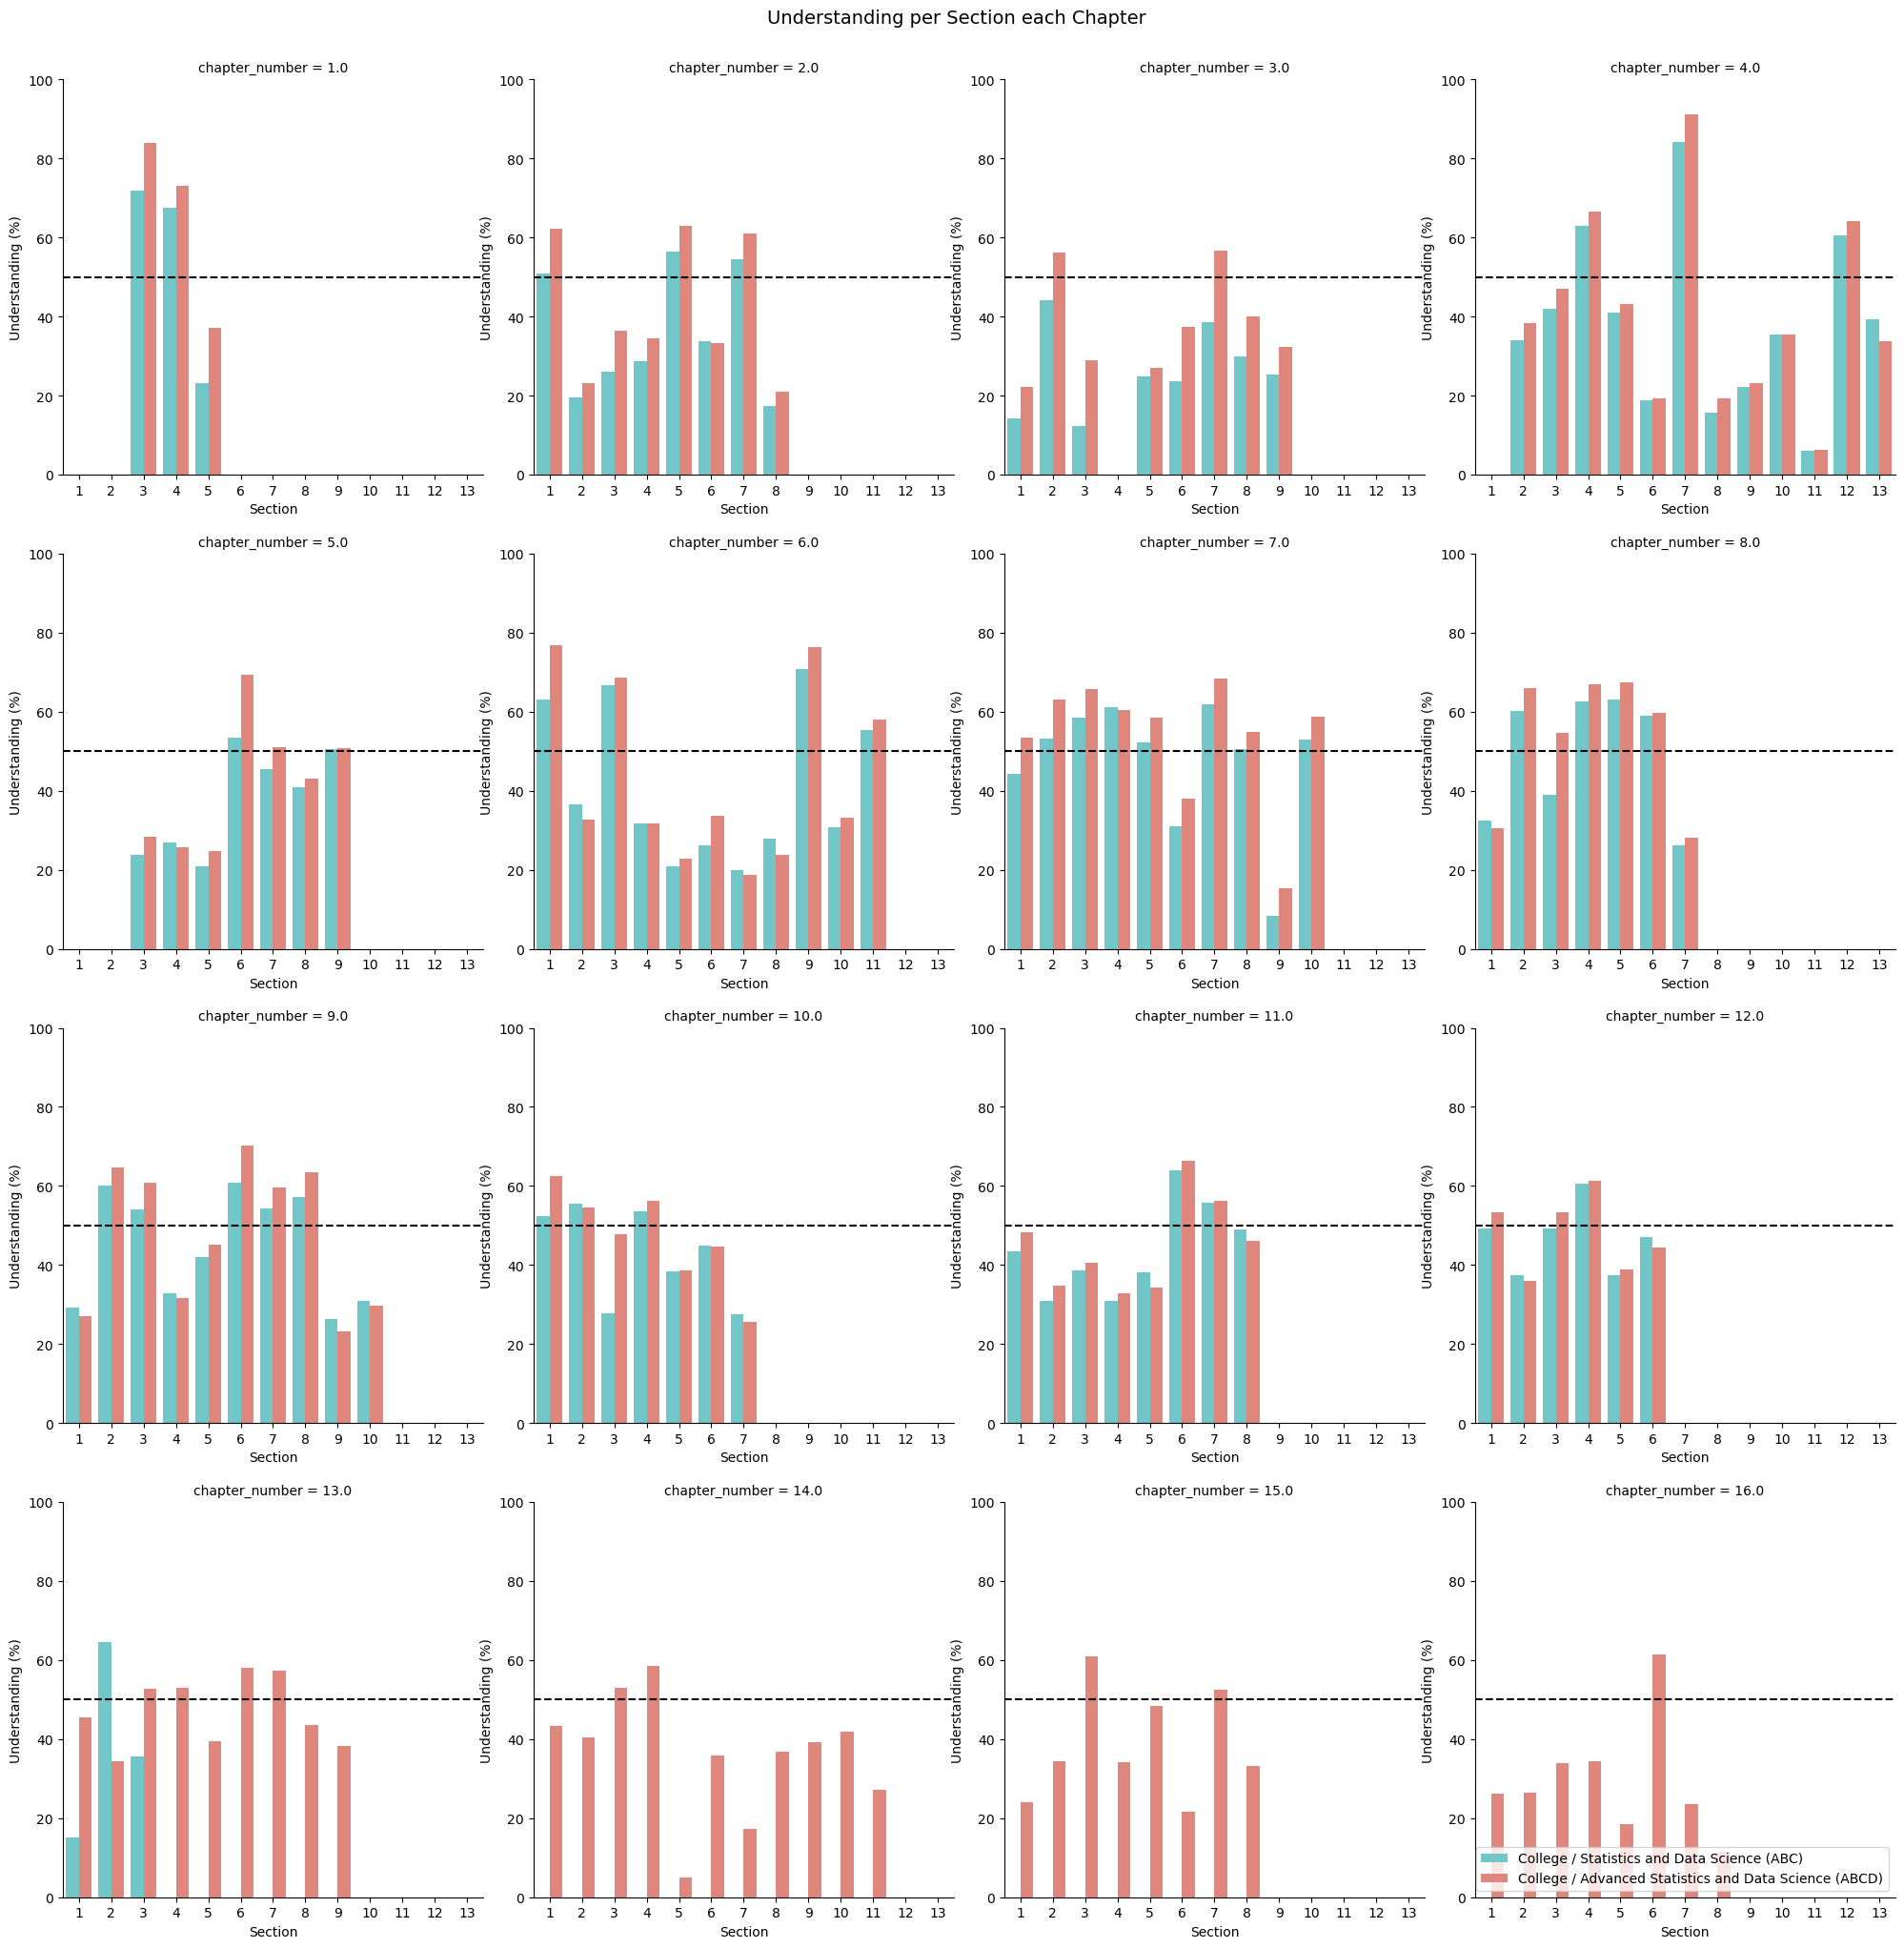

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(100, 100))  # Adjust the figure size here

colors = ["#63d4d5", "#ef7a6c"]
customPalette = sns.color_palette(colors)

points_by_page_sorted = points_by_page.sort_values(by='section_number')

fig = sns.catplot(
    x='section_number',
    y='understanding',
    data=points_by_page_sorted,
    col="chapter_number",
    col_wrap=4,
    kind="bar",
    hue="book",
    legend=False,
    sharex=False, 
    sharey=False,
    palette=customPalette, order = sn
)

axes = fig.axes.flatten()
for ax in axes:
    ax.set_xlabel("Section")
    ax.set_ylabel("Understanding (%)")
    # Set x-axis labels to match the range of section numbers in each subplot
    min_section = min(points_by_page_sorted['section_number'])
    max_section = max(points_by_page_sorted['section_number'])
    #ax.set_xticks(range(min_section, max_section + 1))
    #ax.set_xticklabels(range(min_section, max_section + 1))
    ax.axhline(y=50, color='black', linestyle='--')
    ax.set_yticks(range(0, 101, 20))
    ax.set_yticklabels(range(0, 101, 20))
    plt.subplots_adjust(wspace=0.12, hspace=0.2)

fig.fig.suptitle("Understanding per Section each Chapter", y=1.02, fontsize=14)
plt.legend(loc="lower right")
plt.show()

Since there are clear deterioration in students’ performance for chapter 4, 7 and 11, we need to take a better look at their understanding in different sections in these chapters:

<Figure size 10000x10000 with 0 Axes>

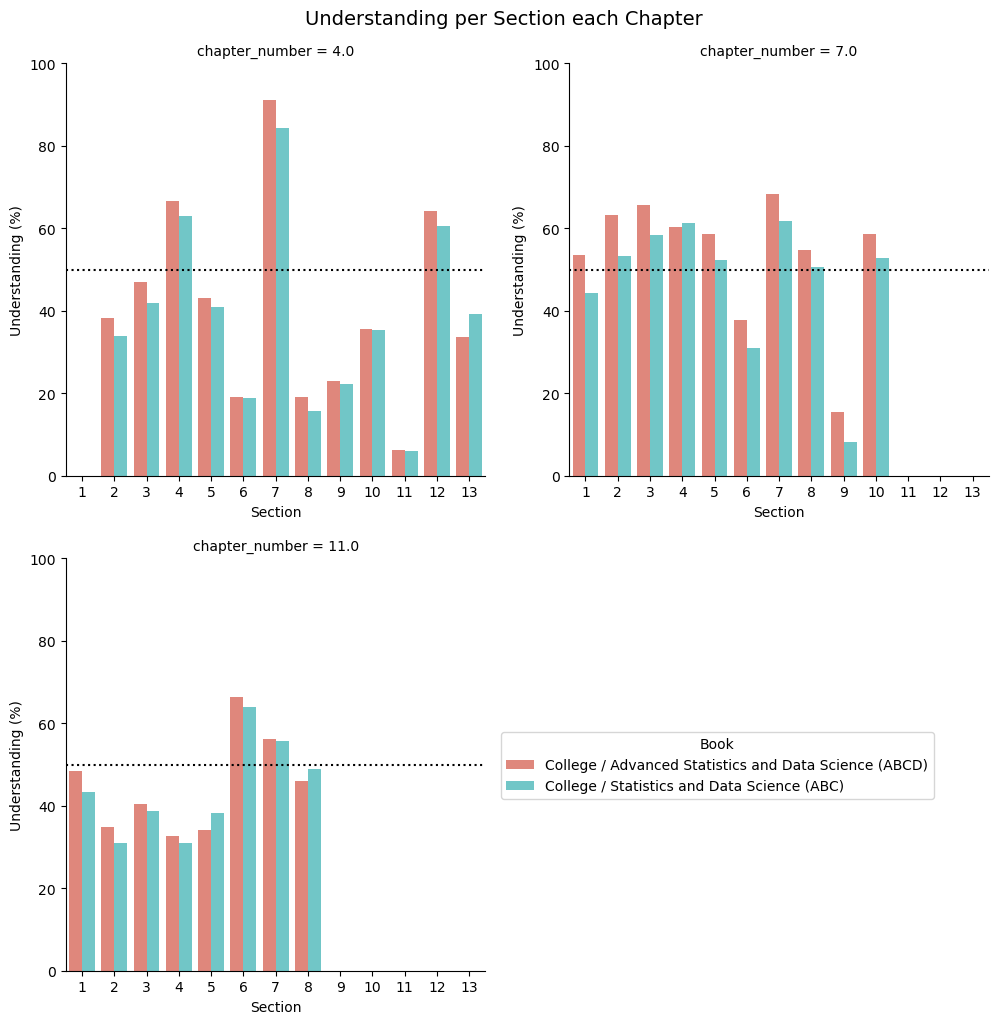

In [13]:
plt.figure(figsize=(100,100))
colors = ["#ef7a6c", "#63d4d5"]
customPalette = sns.set_palette(sns.color_palette(colors))
fig = sns.catplot(x='section_number', y='understanding' , data=viz_df , col="chapter_number", col_wrap = 2,
                  kind = "bar", hue = "book", sharex = False, sharey = False, legend = False, palette = customPalette, order = sn)
axes = fig.axes.flatten()
for ax in axes:
    ax.set_xlabel("Section")
    ax.set_ylabel("Understanding (%)")
    #ax.set_xticks(range(len(viz_df['section_number'].unique())))
    #ax.set_xticklabels(viz_df['section_number'].unique())
    ax.set_yticks(range(0, 101, 20))
    ax.set_yticklabels(range(0, 101, 20))
    ax.axhline(y=50, color='black', linestyle=':')
    plt.subplots_adjust(wspace = 0.2, hspace=0.2)
fig.fig.suptitle("Understanding per Section each Chapter", y = 1.02, fontsize = 14)
plt.legend(title = "Book", bbox_to_anchor=(1.02, 0.4), loc='lower left')
plt.show()

In [14]:
items = pd.read_csv('data/items.csv')

In [15]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   institution_id          1335 non-null   object 
 1   class_id                1335 non-null   object 
 2   item_id                 1335 non-null   object 
 3   item_type               1335 non-null   object 
 4   chapter                 1335 non-null   object 
 5   page                    1335 non-null   object 
 6   dcl_pre_exercise_code   0 non-null      float64
 7   dcl_sample_code         1 non-null      object 
 8   dcl_solution            1 non-null      object 
 9   dcl_sct                 1 non-null      object 
 10  dcl_hint                0 non-null      float64
 11  lrn_activity_reference  129 non-null    object 
 12  lrn_question_reference  1334 non-null   object 
 13  lrn_question_position   1334 non-null   float64
 14  lrn_type                1334 non-null   

In [16]:
items_df = items.loc[items['chapter_number'] >= 1.0]
items_df = items_df[items_df['page'].str.contains('Review')==False]

In [17]:
items_df = items_df.iloc[:,[16, 17, 18]].groupby(['chapter_number', 'section_number'], as_index = False).sum()

In [18]:
items_df = items_df[items_df['review_flag'] != 0]

In [19]:
items_df

,chapter_number,section_number,review_flag


In [20]:
media = pd.read_csv('data/media_views.csv')
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6149 entries, 0 to 6148
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   book              6149 non-null   object 
 1   release           6149 non-null   object 
 2   chapter           6149 non-null   object 
 3   page              6149 non-null   object 
 4   chapter_number    6149 non-null   int64  
 5   section_number    6149 non-null   int64  
 6   institution_id    6149 non-null   object 
 7   class_id          6149 non-null   object 
 8   student_id        6149 non-null   object 
 9   media_id          6149 non-null   int64  
 10  dt_started        1444 non-null   object 
 11  dt_last_event     1444 non-null   object 
 12  access_count      1444 non-null   float64
 13  proportion_video  1444 non-null   float64
 14  proportion_time   1444 non-null   float64
 15  review_flag       6149 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(9

In [21]:
media_df = media.iloc[:, [0, 4, 5, 12, 13, 14]]

In [22]:
media_df.dropna()

,book,chapter_number,section_number,access_count,proportion_video,proportion_time
3,College / Statistics and Data Science (ABC),5,4,1.0,0.999921,0.999921
5,College / Statistics and Data Science (ABC),5,9,1.0,0.999841,0.999841
17,College / Statistics and Data Science (ABC),5,9,1.0,0.315204,0.315204
20,College / Statistics and Data Science (ABC),5,9,1.0,0.999854,0.999854
21,College / Statistics and Data Science (ABC),5,9,2.0,0.485617,0.971233
...,...,...,...,...,...,...
6124,High School / Advanced Statistics and Data Sci...,5,4,1.0,0.003864,0.003864
6125,High School / Advanced Statistics and Data Sci...,5,9,2.0,0.999841,0.999841
6134,High School / Advanced Statistics and Data Sci...,4,2,1.0,0.999778,0.999778
6142,High School / Advanced Statistics and Data Sci...,5,9,1.0,0.999854,0.999854


In [23]:
media_df['complete'] = media_df['proportion_time'] - media_df['proportion_video']
#media_df['complete'].value_counts()

/var/folders/0v/crjdqdx10_ldymfqj89t7tkc0000gn/T/ipykernel_77509/306070157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_df['complete'] = media_df['proportion_time'] - media_df['proportion_video']


In [24]:
media_df[media_df['proportion_time'] > 1]

,book,chapter_number,section_number,access_count,proportion_video,proportion_time,complete
24,College / Statistics and Data Science (ABC),5,9,2.0,0.999854,1.010786,0.010932
95,College / Statistics and Data Science (ABC),4,2,2.0,0.999832,1.999665,0.999832
96,College / Statistics and Data Science (ABC),5,4,2.0,0.999921,1.002533,0.002613
99,College / Statistics and Data Science (ABC),4,2,2.0,0.999778,1.074496,0.074718
144,College / Statistics and Data Science (ABC),4,2,2.0,0.999778,1.129122,0.129344
...,...,...,...,...,...,...,...
5595,College / Statistics and Data Science (ABC),5,4,2.0,0.999921,1.221071,0.221151
5783,College / Advanced Statistics and Data Science...,5,9,2.0,0.999932,1.008060,0.008128
5831,College / Advanced Statistics and Data Science...,4,2,2.0,0.999778,1.999555,0.999778
5843,College / Advanced Statistics and Data Science...,5,4,2.0,0.810330,1.620660,0.810330


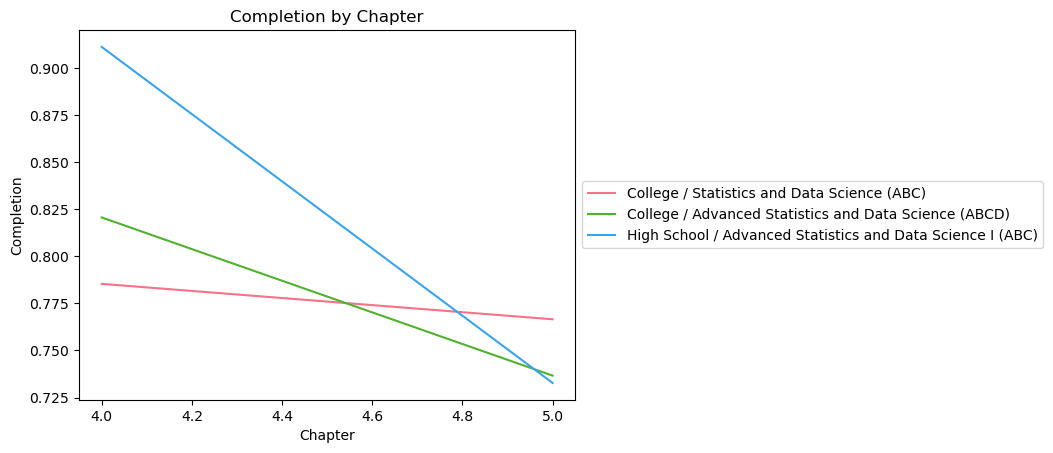

In [25]:
sns.lineplot(data=media_df, x="chapter_number", y="proportion_time", hue = 'book', errorbar=None)
plt.ylabel('Completion')
plt.xlabel('Chapter')
plt.title('Completion by Chapter')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Page views

In [26]:
page_views = pd.read_csv('data/page_views.csv', low_memory = False)
page_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478752 entries, 0 to 478751
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   book                478752 non-null  object 
 1   release             478752 non-null  object 
 2   chapter             478752 non-null  object 
 3   page                478752 non-null  object 
 4   chapter_number      467656 non-null  float64
 5   section_number      467656 non-null  float64
 6   institution_id      478752 non-null  object 
 7   class_id            478752 non-null  object 
 8   student_id          478752 non-null  object 
 9   dt_accessed         478743 non-null  object 
 10  was_complete        478743 non-null  object 
 11  tried_again_dt      34847 non-null   object 
 12  tried_again_clicks  478752 non-null  int64  
 13  engaged             451543 non-null  float64
 14  idle_brief          451543 non-null  float64
 15  idle_long           451543 non-nul

In [27]:
page_views_df = page_views[page_views['page'].str.contains('Review') == False]

In [28]:
page_views_df = page_views_df.iloc[:, [0, 4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]

In [29]:
page_views_df = page_views_df.loc[page_views['chapter_number'] >= 1.0]

In [30]:
page_views_df[page_views_df['review_flag'] == True]

,book,chapter_number,section_number,dt_accessed,was_complete,tried_again_dt,tried_again_clicks,engaged,idle_brief,idle_long,off_page_brief,off_page_long,review_flag


In [31]:
pv = page_views_df[page_views_df['tried_again_clicks'] != 0]
pv = pv[pv['engaged'] > 0]
pv.loc[pv['idle_brief'] != 0]

,book,chapter_number,section_number,dt_accessed,was_complete,tried_again_dt,tried_again_clicks,engaged,idle_brief,idle_long,off_page_brief,off_page_long,review_flag
756,College / Statistics and Data Science (ABC),2.0,2.0,2023-01-16T20:37:37Z,False,2023-01-17T02:32:21Z,2,396477.0,249399.0,0.0,43776.0,0.0,False
1662,College / Statistics and Data Science (ABC),5.0,8.0,2023-01-31T19:01:18Z,False,2023-03-08T14:28:35Z,1,1027338.0,139194.0,0.0,0.0,0.0,False
1663,College / Statistics and Data Science (ABC),5.0,8.0,2023-03-08T14:27:00Z,True,2023-03-08T14:28:35Z,1,113452.0,202014.0,0.0,0.0,0.0,False
3402,College / Statistics and Data Science (ABC),2.0,2.0,2023-01-18T19:39:26Z,False,2023-01-18T22:38:07Z,1,1262107.0,1814549.0,0.0,241710.0,5996547.0,False
3405,College / Statistics and Data Science (ABC),2.0,2.0,2023-01-18T19:06:34Z,False,2023-01-18T22:38:07Z,1,718643.0,361363.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475073,College / Statistics and Data Science (ABC),7.0,4.0,2023-07-06T18:16:25Z,False,2023-07-12T04:00:51Z,1,551932.0,416419.0,0.0,9238.0,0.0,False
475108,College / Statistics and Data Science (ABC),8.0,4.0,2023-07-08T20:27:48Z,False,2023-07-12T04:43:08Z,1,99797.0,300967.0,0.0,644457.0,6133392.0,False
475109,College / Statistics and Data Science (ABC),8.0,4.0,2023-07-09T05:43:02Z,False,2023-07-12T04:43:08Z,1,33380.0,177927.0,0.0,614435.0,0.0,False
477066,High School / Advanced Statistics and Data Sci...,2.0,5.0,2023-02-17T03:36:14Z,True,2023-02-17T03:38:41Z,2,99796.0,138952.0,0.0,0.0,0.0,False


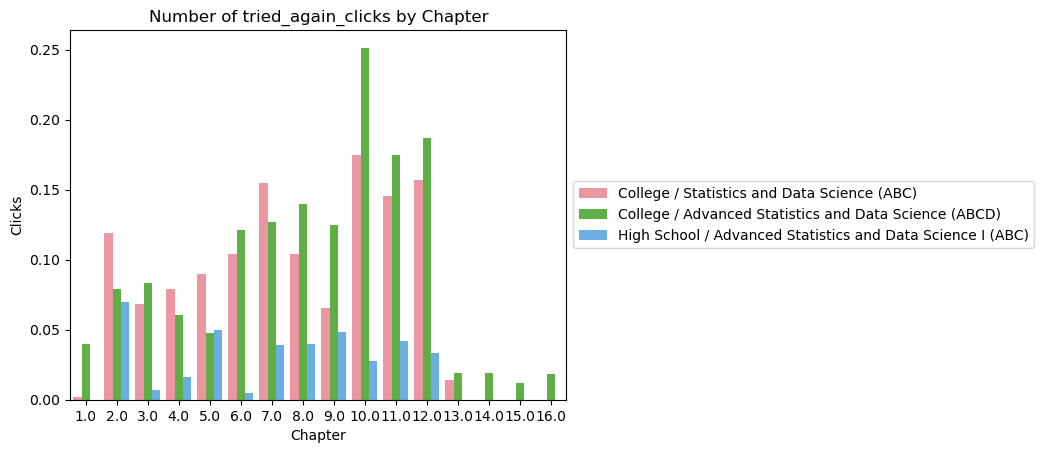

In [32]:
sns.barplot(data=page_views_df, x="chapter_number", y="tried_again_clicks", hue = 'book', errorbar=None)
plt.ylabel('Clicks')
plt.xlabel('Chapter')
plt.title('Number of tried_again_clicks by Chapter')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()